In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred


In [7]:
api_key ='e28a18a8862dd1f5721623b34fbc0725'

In [8]:

# Initialize with your API key
fred = Fred(api_key=api_key)


In [9]:
#UHC stock price
#prices of premiums and deductibles 
#mediam family income US
#inflation

In [10]:
unh_data = yf.download("UNH", start="2009-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [13]:
unh_data = yf.download("UNH", start="2009-01-01", end="2023-12-31")[['Close']].reset_index()

# Convert the date column to string (e.g. "YYYY-MM-DD")
unh_data['Date'] = unh_data['Date'].dt.strftime('%Y-%m-%d')

# 2) Median Family Income from FRED
median_income_series = fred.get_series('MEFAINUSA646N', observation_start='2009-01-01')
median_df = median_income_series.reset_index()
median_df.columns = ['Date', 'Income']

# Convert to string as well
median_df['Date'] = median_df['Date'].dt.strftime('%Y-%m-%d')

# Build a combined dict
combined = {
    "unh_data": unh_data.to_dict(orient='records'),
    "median_income": median_df.to_dict(orient='records')
}

# Save to JSON
with open('combined_data.json', 'w') as f:
    json.dump(combined, f, indent=2)

print("combined_data.json created successfully!")

[*********************100%***********************]  1 of 1 completed


combined_data.json created successfully!


In [14]:
median_df

,Date,Income
0,2009-01-01,60090.0
1,2010-01-01,60240.0
2,2011-01-01,60970.0
3,2012-01-01,62240.0
4,2013-01-01,65470.0
5,2014-01-01,66630.0
6,2015-01-01,70700.0
7,2016-01-01,72710.0
8,2017-01-01,76140.0
9,2018-01-01,78650.0


In [15]:
combined

{'unh_data': [{'Date': '2009-01-02', 'Close': 27.59000015258789},
  {'Date': '2009-01-05', 'Close': 27.139999389648438},
  {'Date': '2009-01-06', 'Close': 26.5},
  {'Date': '2009-01-07', 'Close': 26.299999237060547},
  {'Date': '2009-01-08', 'Close': 26.709999084472656},
  {'Date': '2009-01-09', 'Close': 26.450000762939453},
  {'Date': '2009-01-12', 'Close': 25.6200008392334},
  {'Date': '2009-01-13', 'Close': 25.360000610351562},
  {'Date': '2009-01-14', 'Close': 24.079999923706055},
  {'Date': '2009-01-15', 'Close': 24.889999389648438},
  {'Date': '2009-01-16', 'Close': 25.5},
  {'Date': '2009-01-20', 'Close': 24.15999984741211},
  {'Date': '2009-01-21', 'Close': 25.049999237060547},
  {'Date': '2009-01-22', 'Close': 27.190000534057617},
  {'Date': '2009-01-23', 'Close': 28.040000915527344},
  {'Date': '2009-01-26', 'Close': 28.149999618530273},
  {'Date': '2009-01-27', 'Close': 29.079999923706055},
  {'Date': '2009-01-28', 'Close': 29.989999771118164},
  {'Date': '2009-01-29', 'Clos

In [41]:

# The index is a datetime index, and the values are the data points
from fredapi import Fred

fred = Fred(api_key=api_key)

median_family_income = fred.get_series(
    'MEFAINUSA646N',              # The series ID
    observation_start='2009-01-01'  # Start date
)


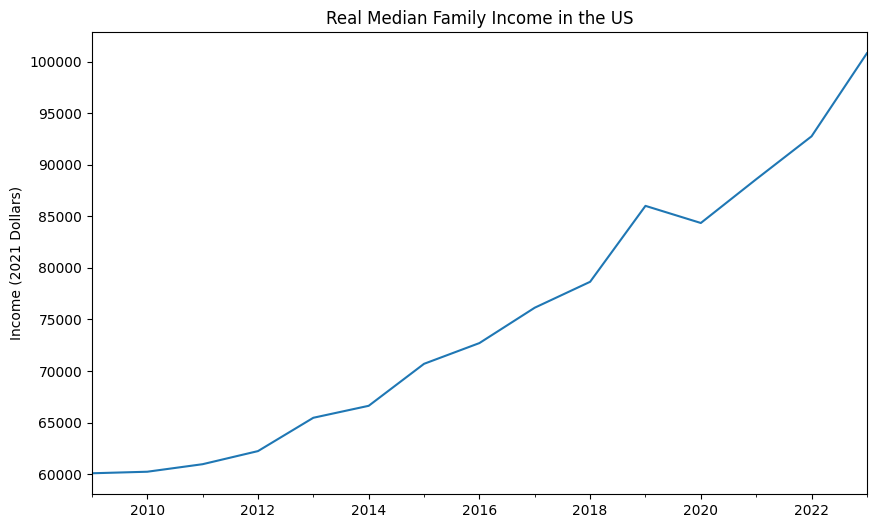

In [42]:

median_family_income.plot(figsize=(10, 6), title="Real Median Family Income in the US")
plt.ylabel("Income (2021 Dollars)")
plt.show()

[*********************100%***********************]  1 of 1 completed


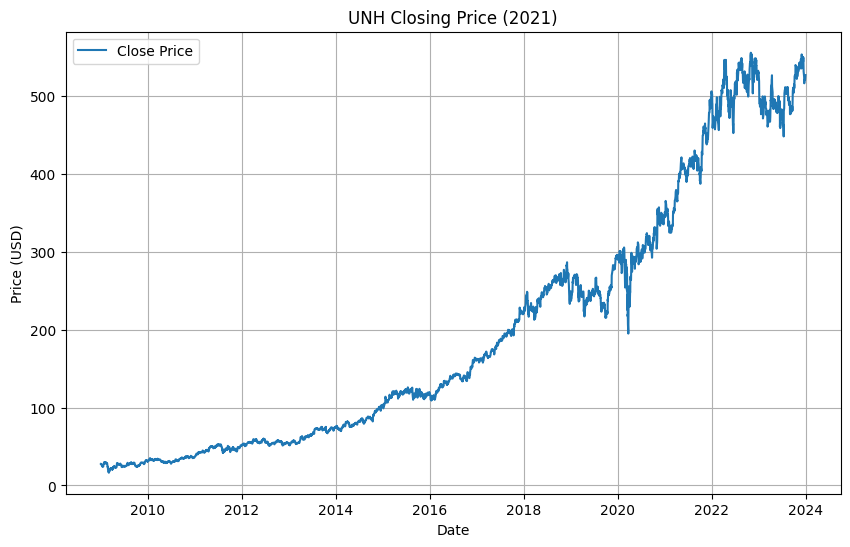

In [43]:


# Using yf.download
data = yf.download(
    "UNH",              # Ticker symbol
    start="2009-01-01", # Start date (YYYY-MM-DD)
    end="2023-12-31"    # End date   (YYYY-MM-DD)
)
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title("UNH Closing Price (2021)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

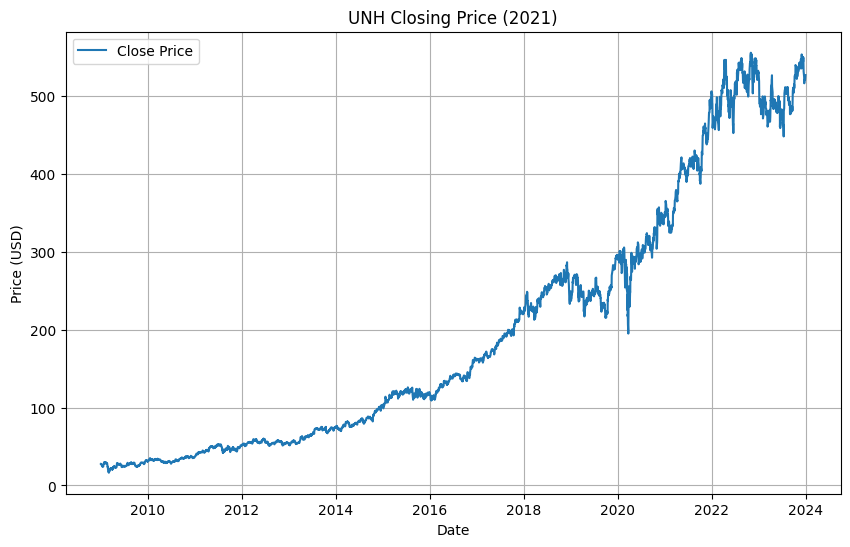

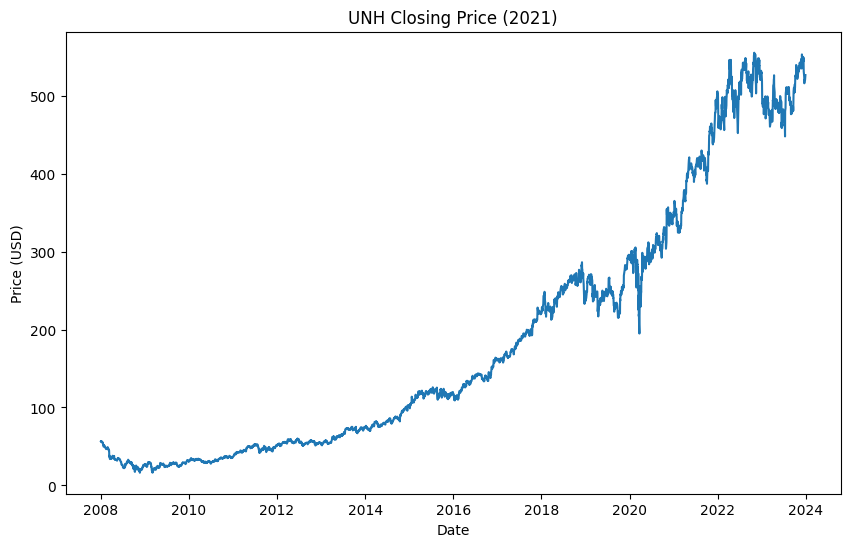

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data.index, y=data["Close"])
plt.title("UNH Closing Price (2021)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

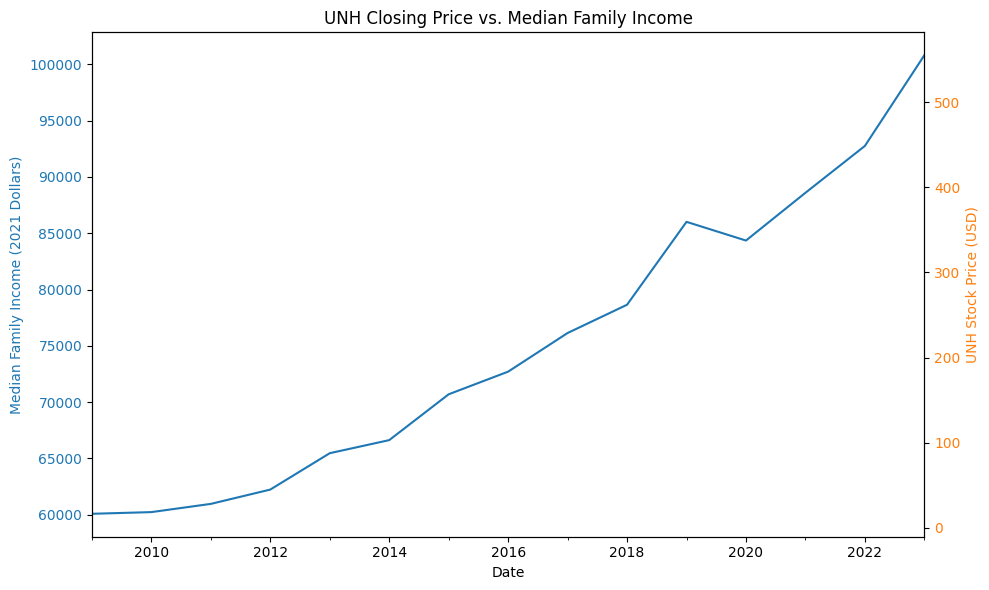

In [44]:
import matplotlib.pyplot as plt

# Suppose you already have the two data sets
# 1) median_family_income: a Pandas Series indexed by date
# 2) data['Close']: a Pandas Series (UNH Closing Price) indexed by date

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Plot median family income on the first y-axis --- #
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Median Family Income (2021 Dollars)', color=color1)
median_family_income.plot(ax=ax1, color=color1, label='Median Family Income')
ax1.tick_params(axis='y', labelcolor=color1)

# --- Create a second y-axis sharing the same x-axis --- #
ax2 = ax1.twinx()  # This sets up a second y-axis on the right side
color2 = 'tab:orange'
ax2.set_ylabel('UNH Stock Price (USD)', color=color2)
ax2.plot(data.index, data['Close'], color=color2, label='UNH Close Price')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("UNH Closing Price vs. Median Family Income")
fig.tight_layout()  # Improves spacing so labels don't overlap
plt.show()


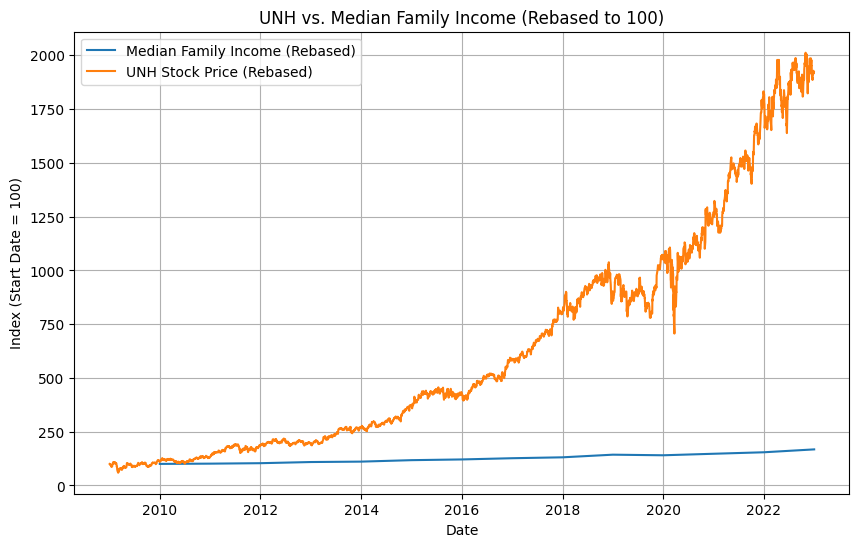

In [45]:
import matplotlib.pyplot as plt

# 1) Find a common date (the later of the two minimum dates)
common_start_date = max(median_family_income.index.min(), data.index.min())

# 2) Use .asof() to get the last known value on or before that date
#    (helpful if that exact date is not in the index)
income_base = median_family_income.asof(common_start_date)
stock_base = data['Close'].asof(common_start_date)

norm_income = (median_family_income / income_base) * 100
norm_stock  = (data['Close']            / stock_base)  * 100

# Restrict both series to the overlapping date range
start = common_start_date
end   = min(median_family_income.index.max(), data.index.max())
norm_income = norm_income.loc[start:end]
norm_stock  = norm_stock.loc[start:end]

plt.figure(figsize=(10, 6))
plt.plot(norm_income.index, norm_income, label='Median Family Income (Rebased)')
plt.plot(norm_stock.index, norm_stock, label='UNH Stock Price (Rebased)')
plt.title("UNH vs. Median Family Income (Rebased to 100)")
plt.xlabel("Date")
plt.ylabel("Index (Start Date = 100)")
plt.legend()
plt.grid(True)
plt.show()


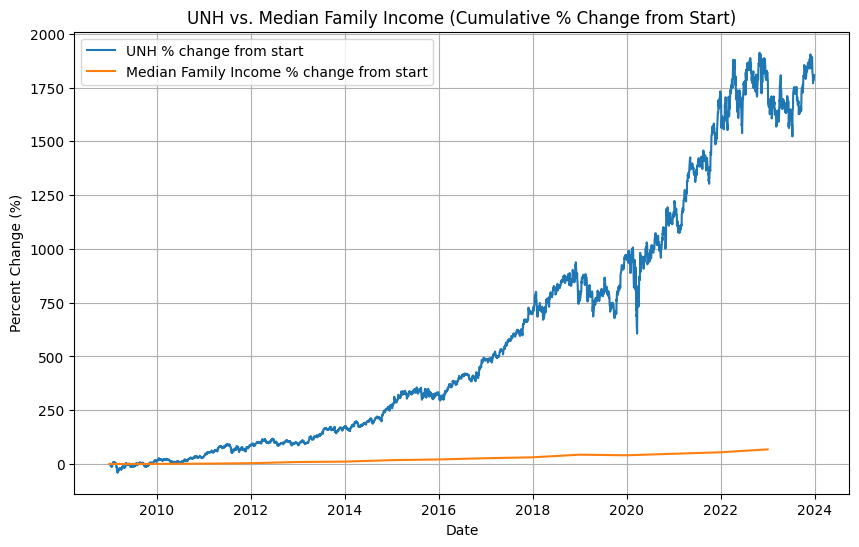

In [47]:
import matplotlib.pyplot as plt

# 1) Extract your two time series: UNH stock prices and median family income
#    Suppose they're aligned (or can be aligned) by date.
unh_close = data['Close']  # from yf.download
mfi = median_family_income  # from FRED (Pandas Series)

# 2) Get the first values
unh_start = unh_close.iloc[0]
mfi_start = mfi.iloc[0]

# 3) Calculate percent change from the first data point
unh_pct_change = (unh_close - unh_start) / unh_start * 100
mfi_pct_change = (mfi - mfi_start) / mfi_start * 100

# 4) Plot
plt.figure(figsize=(10, 6))
plt.plot(unh_pct_change.index, unh_pct_change, label='UNH % change from start')
plt.plot(mfi_pct_change.index, mfi_pct_change, label='Median Family Income % change from start')
plt.xlabel('Date')
plt.ylabel('Percent Change (%)')
plt.title("UNH vs. Median Family Income (Cumulative % Change from Start)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\jmcel\AppData\Local\Temp\ipykernel_35320\4232688571.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  unh_annual = unh_close.resample('Y').last()


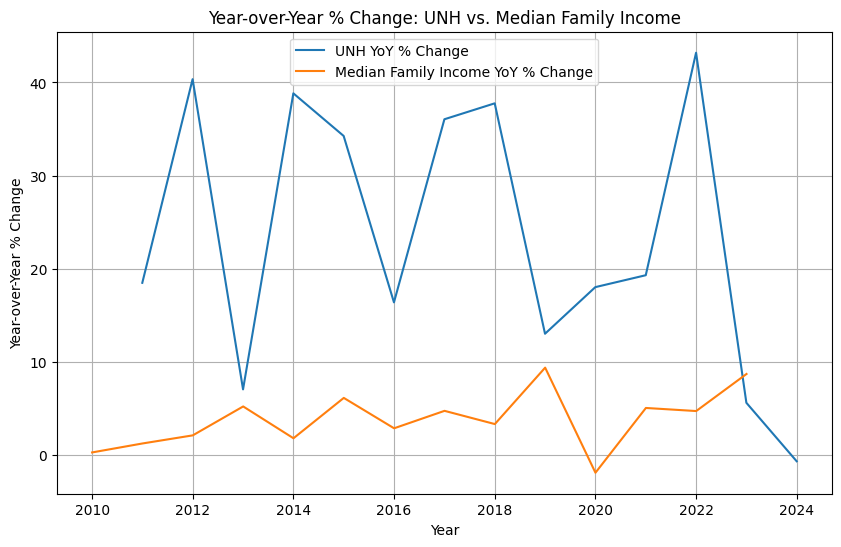

In [48]:
import matplotlib.pyplot as plt

# Both data sets could be at different frequencies, so be mindful of alignment.
# Let's assume we have annual data for median_family_income and maybe daily/weekly for UNH.
# For a fair yoy comparison, you might resample UNH monthly or yearly.

# Resample UNH to annual 'Close' (taking last trading day’s price each year)
unh_annual = unh_close.resample('Y').last()

# Now do yoy percent change
unh_yoy = unh_annual.pct_change(periods=1) * 100   # yoy % change
mfi_yoy = mfi.pct_change(periods=1) * 100

plt.figure(figsize=(10, 6))
plt.plot(unh_yoy.index, unh_yoy, label='UNH YoY % Change')
plt.plot(mfi_yoy.index, mfi_yoy, label='Median Family Income YoY % Change')
plt.xlabel('Year')
plt.ylabel('Year-over-Year % Change')
plt.title('Year-over-Year % Change: UNH vs. Median Family Income')
plt.legend()
plt.grid(True)
plt.show()


In [57]:

# 1) Read the Excel file

df = pd.read_csv("./API_SP.DYN.LE00.IN_DS2_en_csv_v2_81.csv", header=4)

# Optionally, see the columns and a sample of the data
print(df.columns)



Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [58]:
# 2) Filter rows for specific countries
wanted_countries = ['United Kingdom', 'United States', 'Canada']
df_filtered = df[df['Country Name'].isin(wanted_countries)].copy()


In [59]:
# 3) Filter columns for 2009–2021
# We'll keep "Country Name" so we know which row belongs to which country.
year_cols = [str(year) for year in range(1993, 2022)]  # 2009 through 2021
# Also keep 'Country Name'
cols_to_keep = ['Country Name'] + year_cols

df_filtered = df_filtered[cols_to_keep]


In [60]:
df_filtered.head()

,Country Name,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Canada,77.704878,77.871707,77.977317,78.220244,78.412439,78.623659,78.839024,79.166829,79.398049,...,81.663659,81.744878,81.784390,81.815610,81.924878,81.832927,81.843902,82.223902,81.660488,81.587073
81,United Kingdom,76.385366,76.885366,76.836585,77.087805,77.210976,77.190244,77.390244,77.741463,77.992683,...,80.904878,81.004878,81.304878,80.956098,81.156098,81.256098,81.256098,81.404878,80.351220,80.700000
251,United States,75.419512,75.619512,75.621951,76.026829,76.429268,76.580488,76.582927,76.636585,76.836585,...,78.741463,78.741463,78.841463,78.690244,78.539024,78.539024,78.639024,78.787805,76.980488,76.329268


In [61]:
# 4) Convert wide to long
# We'll "melt" the table so each row is (Country, Year, Value).
df_melted = df_filtered.melt(id_vars='Country Name', var_name='Year', value_name='LifeExpectancy')

# Now pivot so that each year is a row, each country is a column.
df_pivot = df_melted.pivot(index='Year', columns='Country Name', values='LifeExpectancy').reset_index()

# Rename columns to something simpler if you like
# e.g., columns = ['Year', 'Canada', 'United Kingdom', 'United States']
df_pivot.columns.name = None


In [62]:
df_pivot.to_json("life_expectancy.json", orient="records")


In [63]:
df_pivot.to_csv("life_expectancy.csv", index=False)


In [65]:
import yfinance as yf
import pandas as pd
import json

# --- Settings ---
start_date = "2009-01-01"
end_date   = "2023-01-01"

# Define the stock tickers and the keys to use in the JSON output.
tickers = {
    "unh_data": "UNH",       # United Healthcare
    "centene_data": "CNC",   # Centene Corporation (verify symbol if needed)
    "cigna_data": "CI",      # Cigna Corporation
    "aetna_data": "AET"      # Aetna (if available; check current ticker)
}

# --- Download Stock Data ---
data_dict = {}

for key, symbol in tickers.items():
    print(f"Downloading data for {symbol}...")
    df = yf.download(symbol, start=start_date, end=end_date)
    if df.empty:
        print(f"Warning: No data found for {symbol}.")
        continue
    df.reset_index(inplace=True)  # Make sure Date becomes a column
    # Format the Date column as "YYYY-MM-DD"
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
    # Store only the Date and Close columns
    data_dict[key] = df[['Date', 'Close']].to_dict(orient='records')

# --- Read Median Household Income Data ---
# (Assumes the CSV file has at least two columns: "Date" and "Income".)
# If your CSV’s header is not on the first row, adjust the header parameter accordingly.
income_df = pd.read_csv("median_income.csv")  # e.g. use header=2 if headers are on row 3: pd.read_csv("median_income.csv", header=2)
# Convert the Date column to the desired format.
income_df['Date'] = pd.to_datetime(income_df['Date']).dt.strftime('%Y-%m-%d')
data_dict["median_income"] = income_df[['Date', 'Income']].to_dict(orient='records')

# --- Save the Combined Data to JSON ---
output_filename = "combined_stock_income.json"
with open(output_filename, "w") as f:
    json.dump(data_dict, f, indent=2)

print(f"Data successfully saved to {output_filename}")


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data successfully saved to combined_stock_income.json
